# Basic Web Scraping and Word Cloud

In [1]:
## Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

print("-"*25)
print ("Initiation is DONE !!")
print("-"*25)

-------------------------
Initiation is DONE !!
-------------------------


In [2]:
# Specifying url of the web page
my_url = urlopen('https://en.wikipedia.org/wiki/Turkey').read()

soup = BeautifulSoup(my_url,'lxml')
# soup

In [3]:
print(set([text.parent.name for text in soup.find_all(text=True)]))

{'h1', 'a', 'b', 'nav', 'code', 'form', 'caption', 'footer', 'tbody', 'body', 'html', 'i', 'h2', 'sup', 'abbr', 'style', 'div', 'h3', 'td', 'q', 'table', 'script', 'ul', 'li', 'dt', 'span', 'head', 'title', 'bdi', '[document]', 'tr', 'p', 'ol', 'cite', 'small', 'label', 'th'}


In [4]:
# Extract the plain text content from paragraphs
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text + ' '
    
text[0:1000]

"\n Turkey (Turkish: Türkiye [ˈtyɾcije]), officially the Republic of Turkey (Turkish: Türkiye Cumhuriyeti [ˈtyɾcije dʒumˈhuːɾijeti] (listen)), is a transcontinental country located mainly on the Anatolian Peninsula in Western Asia, with a smaller portion on the Balkan Peninsula in Southeastern Europe. Turkey is bordered on its northwest by Greece and Bulgaria; north by the Black Sea; northeast by Georgia; east by Armenia, Azerbaijan, and Iran; southeast by Iraq; south by Syria and the Mediterranean Sea; and west by the Aegean Sea. Approximately 70 to 80 percent of the country's citizens identify as Turkish,[10][11] while Kurds are the largest minority, at between 15 to 20 percent of the population. Istanbul, which straddles Europe and Asia, is the country's largest city, while Ankara is the capital.\n One of the earliest permanently settled regions, present-day Turkey was home to important Neolithic sites such as Göbekli Tepe, the world's oldest known temple founded in the 10th millenn

In [5]:
# Clean text
text = re.sub(r'\[.*?\]+', '', text)
text = text.replace('\n', '')
text = text.replace(';', '')
text = text.replace(':', '')
text = text.replace(',', '')
text = text.replace('.', '')
text = text.replace("'s", '')
text = text.replace("'", '')
text = text.replace('"', '')
text = text.replace("(", '')
text = text.replace(")", '')
text = text.replace("-", ' ')

text[0:1000]

' Turkey Turkish Türkiye  officially the Republic of Turkey Turkish Türkiye Cumhuriyeti  listen is a transcontinental country located mainly on the Anatolian Peninsula in Western Asia with a smaller portion on the Balkan Peninsula in Southeastern Europe Turkey is bordered on its northwest by Greece and Bulgaria north by the Black Sea northeast by Georgia east by Armenia Azerbaijan and Iran southeast by Iraq south by Syria and the Mediterranean Sea and west by the Aegean Sea Approximately 70 to 80 percent of the country citizens identify as Turkish while Kurds are the largest minority at between 15 to 20 percent of the population Istanbul which straddles Europe and Asia is the country largest city while Ankara is the capital One of the earliest permanently settled regions present day Turkey was home to important Neolithic sites such as Göbekli Tepe the world oldest known temple founded in the 10th millennium BC and Çatalhöyük which has evidence of early agriculture and cattle and sheep 

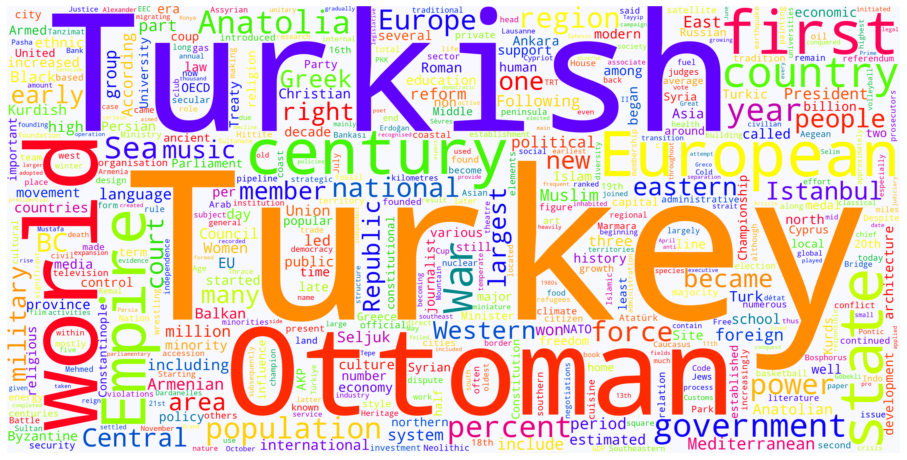

In [6]:
wordcloud = WordCloud(width = 4000, height = 2000,
                      random_state=28,
                      background_color='ghostwhite', colormap='prism',
                      collocations=False,
                      max_words=500,
                      stopwords = STOPWORDS).generate(text)

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

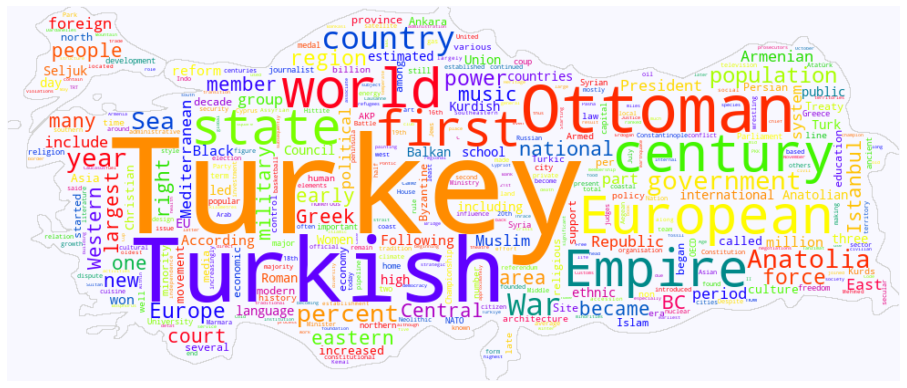

In [7]:
mask = np.array(Image.open('Turkey_map_2.png'))

wordcloud = WordCloud(width = 4000, height = 3000,
                      random_state=28,
                      background_color='ghostwhite', colormap='prism',
                      collocations=False, stopwords = STOPWORDS,
                      max_words=400,
                      contour_width=1,
                      contour_color='lightgrey',
                      mask=mask).generate(text)

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

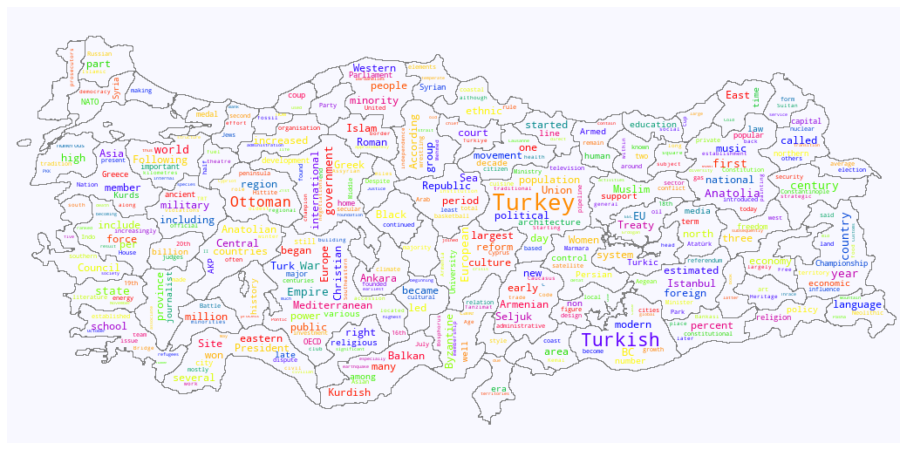

In [8]:
mask = np.array(Image.open('Turkey_map.png'))

wordcloud = WordCloud(width = 4000, height = 3000,
                      random_state=28,
                      background_color='ghostwhite', colormap='prism',
                      collocations=False, stopwords = STOPWORDS,
                      max_words=400,
                      contour_width=1,
                      contour_color='grey',
                      mask=mask).generate(text)

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()